In [6]:
import sys  
sys.path.insert(0, '../code')
import deep_forest
import torch as th
from torch import nn as nn
import matplotlib.pyplot as plt
%matplotlib inline
from math import pi

In [7]:
# 1000 x 2 ==> batch x features
x = th.rand([1000, 2])
x[:, 0] *= 2*pi
x[:, 0] -= pi
x[:, 1] *= 3
x[:, 1] -= 1.5

# Labels
y = (th.sin(x[:, 0]) < x[:, 1]).long()

In [8]:
model = deep_forest.DeepForest(10, 4, 2, 1, 10)

In [9]:
device = th.device("cuda" if th.cuda.is_available() else "cpu")
model = model.to(device)
x = x.to(device)
y = y.to(device)

In [10]:
optimizer = th.optim.Adam(model.parameters())
for i in range(2000):
    model.populate_best(x[:900, :], y[:900])
    optimizer.zero_grad()

    loss = model.loss(x[:900, :], y[:900], device)
    loss.backward()
    optimizer.step()

    if i % 100 == 0:
        print("====EPOCH %d====\nAcc: %s\nLoss: %s" % (i, str(th.mean((model.forward(x[:900, :], device) == y[:900]).float())), str(loss)))

print("==============\nFINAL ACC: %s" % str(th.mean((model.forward(x[:900, :], device) == y[:900]).float())))

====EPOCH 0====
Acc: tensor(0.8389)
Loss: tensor([217.9918], grad_fn=<AddBackward0>)
====EPOCH 100====
Acc: tensor(0.8578)
Loss: tensor([211.3230], grad_fn=<AddBackward0>)
====EPOCH 200====
Acc: tensor(0.8900)
Loss: tensor([209.5146], grad_fn=<AddBackward0>)
====EPOCH 300====
Acc: tensor(0.9011)
Loss: tensor([208.3470], grad_fn=<AddBackward0>)
====EPOCH 400====
Acc: tensor(0.9089)
Loss: tensor([208.4655], grad_fn=<AddBackward0>)
====EPOCH 500====
Acc: tensor(0.9289)
Loss: tensor([209.8129], grad_fn=<AddBackward0>)
====EPOCH 600====
Acc: tensor(0.9367)
Loss: tensor([209.6794], grad_fn=<AddBackward0>)
====EPOCH 700====
Acc: tensor(0.9567)
Loss: tensor([209.2242], grad_fn=<AddBackward0>)
====EPOCH 800====
Acc: tensor(0.9644)
Loss: tensor([209.1371], grad_fn=<AddBackward0>)
====EPOCH 900====
Acc: tensor(0.9767)
Loss: tensor([209.0174], grad_fn=<AddBackward0>)
====EPOCH 1000====
Acc: tensor(0.9800)
Loss: tensor([209.6351], grad_fn=<AddBackward0>)
====EPOCH 1100====
Acc: tensor(0.9844)
Loss:

tensor([1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1])
tensor([1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1])


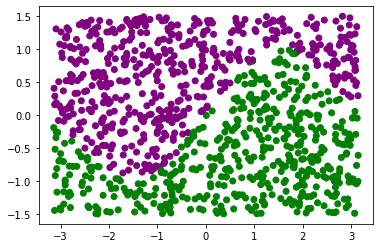

In [11]:
print(y[:15])
print(model.forward(x, device)[:15].long())
cdict = {0: 'green', 1: 'purple'}
plt.scatter(x[:, 0], x[:, 1], c=[cdict[i] for i in model.forward(x, device).cpu().numpy()])
plt.show()

In [12]:
mlp = nn.Sequential(
    nn.Linear(2, 15),
    nn.LeakyReLU(),
    nn.Linear(15, 15),
    nn.LeakyReLU(),
    nn.Linear(15, 2),
    nn.Softmax()
)

optimizer = th.optim.Adam(mlp.parameters())
for i in range(1000):
    optimizer.zero_grad()

    preds = mlp(x[:900, :])
    loss = nn.functional.cross_entropy(preds, (y[:900].type(th.LongTensor)).to(device))
    loss.backward()
    optimizer.step()

    if i % 100 == 0:
        print("====EPOCH %d====\nAcc: %s\nLoss: %s" % (i, str(th.mean((th.argmax(mlp(x[900:]), 1) == y[900:]).float())), str(loss)))

print("==============\nFINAL ACC: %s" % str(th.mean((th.argmax(mlp(x[900:]), 1) == y[900:]).float())))

====EPOCH 0====
Acc: tensor(0.5400)
Loss: tensor(0.6982, grad_fn=<NllLossBackward>)
====EPOCH 100====
Acc: tensor(0.8500)
Loss: tensor(0.5168, grad_fn=<NllLossBackward>)
====EPOCH 200====
Acc: tensor(0.9100)
Loss: tensor(0.4154, grad_fn=<NllLossBackward>)
====EPOCH 300====
Acc: tensor(0.9600)
Loss: tensor(0.3867, grad_fn=<NllLossBackward>)
====EPOCH 400====
Acc: tensor(0.9600)
Loss: tensor(0.3663, grad_fn=<NllLossBackward>)
====EPOCH 500====
Acc: tensor(0.9600)
Loss: tensor(0.3527, grad_fn=<NllLossBackward>)
====EPOCH 600====
Acc: tensor(0.9800)
Loss: tensor(0.3433, grad_fn=<NllLossBackward>)
====EPOCH 700====
Acc: tensor(0.9800)
Loss: tensor(0.3376, grad_fn=<NllLossBackward>)
====EPOCH 800====
Acc: tensor(0.9800)
Loss: tensor(0.3336, grad_fn=<NllLossBackward>)
====EPOCH 900====
Acc: tensor(0.9800)
Loss: tensor(0.3307, grad_fn=<NllLossBackward>)
FINAL ACC: tensor(0.9800)


In [17]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=4)
clf.fit(x[:900, :].numpy(), y[:900].numpy())
print(clf.score(x[900:, :].numpy(), y[900:].numpy()))

0.98
